# Checking Account Data, Sleep and Weather
##### Rachel Brodhead | CPSC 222 | Dr. Gina Sprint | 4-15-2022
#### In this Jupyter Notebook, we are going to take a look at my personal checking account data, as well as a log of how many hours of sleep I've been getting per night, and daily weather data for Spokane. 
# INCLUDE SOURCES

### Introduction:
* The goal of this project is to try to either find trends that suggest my sleep habbits affect my spending habbits, or vice versa, and I also want to look at how the weather affects these things, since while we can't change the weather, being aware of it's potential effects might help me be more mindful about making an effort to compensate (by actively trying to spend less/make more time to have quality sleep, etc)
* The data format for my checking and sleep data as well as the weather data is in csv file format, and the weather data comes from our work with the MeteoStat API in DA4
    * The checking data was downloaded from US Bank's website.   The dataset had 69 instances after cleaning, and already had the following attributes: "Date","Transaction","Name","Memo", and"Amount".  The "Transaction" attribute was binary- either "Credit" or "Debit". The "Memo" Attribute just said "Download from usbank.com.****". Then, from the "Name" information, I manually added a column with a class attribute "Category", that groups purchases into the following types:
        * Gas
        * Food (from restaurants or convenience stores, etc)
        * Groceries
        * Pandora
        * Gym
        * Income (for a positive value transaction)
        * Coffee
        * Vending Machine
        * Clothes
        * Travel
        * Misc
    * While I typically use cash, I tried to use my card about once per day during this time, since I knew that I wanted to join this data to another table based on the date.
    * Since I only had about 3 dates with multiple transactions, I summed a couple transactions for vending machines that occurred at the same time, but was split into multiple purchases/rows, in order to make the joining of the tables more smooth.  I also had a few dates which had more than one row (multiple purchases), so to handle that, I just manually looked for the most frequent purchase type per date, and summed the amounts of those purchases.
        * Alternatively, I was looking at turning each instance into a set of columns so all of the transactions would have been condensed into rows with unique dates, but since I was only looking at a few instances, I felt that it was ok to just drop a few rows
    * The sleep data was a manually collected dataset that I just recorded in a notebook and then transcribed into a csv file.  It's attributes are "Date" and "Hours Sleep", rounded to the nearest half hour.  For this I had 57 instances, spanning from 2022-02-14 to 2022-04-12 (with one missing date)
    * The Weather data stems from our work with the MeteoStat API, and has the following attributes:
        * Date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,tsun
        * I selected the start date to be "" and the end date to be "2022-04-10", giving me 69 instances
    
    #### Goal of this Project:
    * In this project, I'm really hoping to see where I'm spending the most money (unnecessarily), as well as what factors can play into my spending habits.  By identifying the cause of some of my spending, I'm hoping to come up with ways of avoiding extra spending based on the circumstance, while also possibly identifying other trends related to my sleep.
        * Some questions I am thinking of asking:
            * How do my coffee purchases relate to my sleep habits?  Do I sleep worse after buying coffee during the day?  Do I buy more coffee after a bad night of sleep?
            * How does my sleep play into how much I spend on food?
            * How does the weather relate to my sleep schedule?
            * How does the weather relate to my spending?
    * Digging into these questions could help me figure out ways to save mone, and potentially sleep better.  I would say that I'm the main stakeholder interested in this result, but also I'm sure that companies could profit off of knowing what purchases people are more likely to make based on things like the weather or hours of sleep, which are attributes that data could be collected on, and then used to improve advertisement targeting.
    


### Data Analysis:
#### First, lets load the data into Dataframes using the Pandas Library:


In [13]:
import pandas as pd
import numpy as np
import importlib
import utils
importlib.reload(utils)

sleep_df=pd.read_csv("sleep.csv")#read sleep into pandas DF

checking_df=pd.read_csv("checking-cleaned.csv")#read  checking into DF

del checking_df["Name"]#Drop name, memmo, since these don't tell us anything new
del checking_df["Memo"]
del checking_df["Transaction"]

#read weather into DF
weather_df=pd.read_csv("spokane_daily_weather_cleaned.csv")

weather_df.drop(["tsun"],axis=1, inplace=True)#Drop tsun and snow since they are mostly NaN values
weather_df.drop(["snow"],axis=1, inplace=True)

merged_sleep_df=sleep_df.merge(checking_df,on=["Date"])# combine checking with sleep

merged_df=weather_df.merge(merged_sleep_df,on=["Date"])# combine checking with weather
merged_df.to_csv("merged.csv")

#### Next, lets see some basic stats on our data:
* Lets take a look at Groceries, Vending Machine, Gas, Food and Coffee categories, since those are more 'elective' spending (Gas isn't 'elective persay but reflects on how much driving I've been doing)

In [14]:


grouped_by_category_checking=merged_df.groupby("Category")

print("Stats for Category: Groceries")
utils.compute_stats("Amount",grouped_by_category_checking.get_group("Groceries"))
print("Stats for Category: Vending Machine")
utils.compute_stats("Amount",grouped_by_category_checking.get_group("Vending Machine"))
print("Stats for Category: Gas")
utils.compute_stats("Amount",grouped_by_category_checking.get_group("Gas"))
print("Stats for Category: Food")
utils.compute_stats("Amount",grouped_by_category_checking.get_group("Food"))
print("Stats for Category: Coffee")
utils.compute_stats("Amount",grouped_by_category_checking.get_group("Coffee"))

Stats for Category: Groceries
{'Count': 5, 'Sum': -200.39000000000001, 'Mean': -40.078, 'Standard Deviation': 46.425732842896515, 'Median': -19.59, 'Min': -121.74, 'Max': -9.27}
Stats for Category: Vending Machine
{'Count': 10, 'Sum': -32.05, 'Mean': -3.2049999999999996, 'Standard Deviation': 1.3495040241181615, 'Median': -2.795, 'Min': -5.91, 'Max': -1.35}
Stats for Category: Gas
{'Count': 2, 'Sum': -72.41, 'Mean': -36.205, 'Standard Deviation': 3.401183617507295, 'Median': -36.205, 'Min': -38.61, 'Max': -33.8}
Stats for Category: Food
{'Count': 10, 'Sum': -134.56, 'Mean': -13.456, 'Standard Deviation': 14.58197989910073, 'Median': -10.265, 'Min': -54.34, 'Max': -4.7}
Stats for Category: Coffee
{'Count': 9, 'Sum': -54.17999999999999, 'Mean': -6.02, 'Standard Deviation': 3.526021128694495, 'Median': -5.05, 'Min': -14.9, 'Max': -3.27}


#### From this, we can see that I spend a lot of money on food, vending machines and coffee, both in the frequency of transactons and the amount
* I would have guessed that my grocery bill would be more significant than these 'elective' food spending, since I percieved that I spend a lot on groceries
    * This makes sense since my grocery visits are less frequent, but with higher total amounts/means of spending so they stick out as being expensive.

## We can also visualize this phenomenon, by creating a pie chart of frequency of purchases:

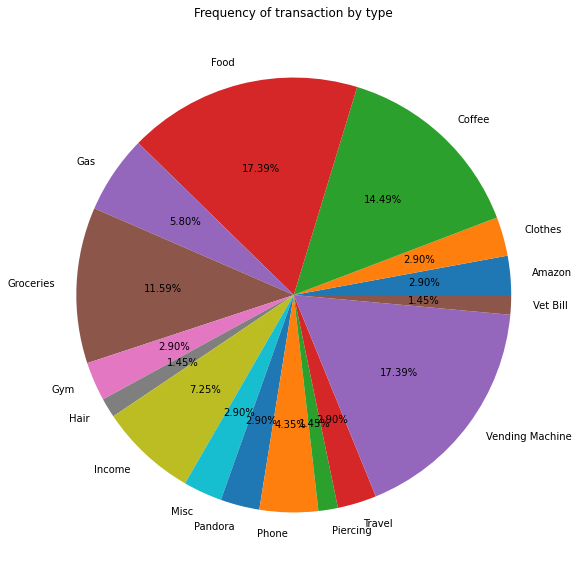

In [15]:
import matplotlib.pyplot as plt
grouped_by_category=checking_df.groupby("Category")

[x_ser,y_ser,z_ser,w_ser]=utils.find_frequency_and_amount(grouped_by_category,"Amount")

plt.figure(figsize=(10,10),) # to create a new "current" figure
plt.pie(y_ser, labels=x_ser, autopct="%.2f%%")
plt.title("Frequency of transaction by type")
plt.show()

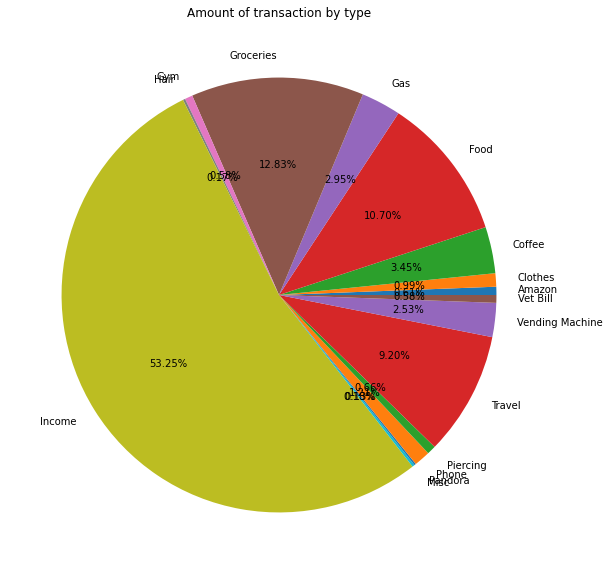

In [16]:
plt.figure(figsize=(10,10)) # to create a new "current" figure
plt.pie(z_ser, labels=x_ser, autopct="%.2f%%")
plt.title("Amount of transaction by type")
plt.show()

### Now lets do a little t-testing for statistical correlation:
* I would guess that on days that I buy coffee, my sleep may be poor.
* Let's do a t-test to gauge the likelyhood of this:

#### Step 1: Identify the null and alternative hypothesis:
* Null hypothesis: Average sleep on days that I buy coffee >= 7
* Alternative hypothesis: Average sleep on days that I buy coffee < 7
#### Step 2: Select a level of Significance:
* Lets let alpha=0.01
#### Step 3: Choose a test statistic:
* We will be conducting a 1 tailed, 1 sample t-test
* For this we use the formula $$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$
#### 4. Formulate a decision rule:
* For this, we will use scipy:

In [17]:
import scipy.stats as stats

coffee=grouped_by_category_checking.get_group("Coffee")
coffee_dates=coffee["Date"]
merged_coffee_sleep=sleep_df.merge(coffee_dates,on="Date")
merged_coffee_sleep_mean=merged_coffee_sleep["Hours Sleep"].mean()
coffee_sleep_ser=merged_coffee_sleep["Hours Sleep"]

print("Average sleep on days with coffee:",merged_coffee_sleep_mean)
average_sleep=merged_sleep_df["Hours Sleep"].mean()
sleep_ser=merged_sleep_df["Hours Sleep"]

print("Average total sleep",average_sleep)
merged_sleep_grouped=merged_sleep_df.groupby("Category")

t_computed,p=stats.ttest_1samp(coffee_sleep_ser,7)
print("T computed:", t_computed,", p:",p)

Average sleep on days with coffee: 6.555555555555555
Average total sleep 7.135714285714286
T computed: -0.8958280175293672 , p: 0.3964987549311927


#### Step 5: Make a decision:
* Since p/2>alpha, we cannot reject our null hypothesis
* This indicates that there is a good enough probability of a sample of sleep hours being equal to 6.55 under normal distribution that it's possible that this is just a coincidence.  
    * If we had a larger dataset, or a lower sample mean, this might allow us to be able to reject our null hypothesis


### Classification Results:
#### Now, let's build a model to predict class labels based on attributes
* For this, I want to take a look at sleep, and what could cause good and bad sleep
    * In order to do this, I can convert my sleep category into a binary category (good or bad) with bad sleep being less than the median
    * Then we can go through the test train split algorithm and use both a Knn and decision tree classifier
        * We can also compare the results
        * What are che challenges with classification?
#### First, lets take a look at making sleep binary (above or below the median):
* Here is a graph of sleep before converting it to a binary value:

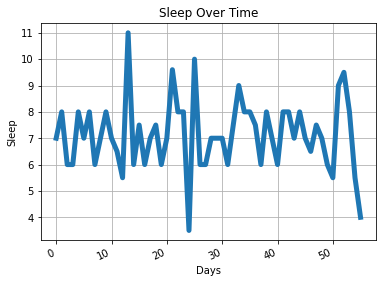

In [18]:
len=list(range(56))
utils.lineplot(len,sleep_ser,"Days","Sleep","Sleep Over Time")

In [19]:
sleep_binary=[]
median_hours=merged_df["Hours Sleep"].median()
print("Median Hours Sleep:",median_hours)
sleep_ser=merged_df["Hours Sleep"]

for value in sleep_ser:#Iterate through each sleep value
    if value <=median_hours:
        sleep_binary.append(0)#0 quantifies bad sleep
    else:
        sleep_binary.append(1)#1 quantifies good sleep

merged_df.drop(["Hours Sleep"], axis=1,inplace=True)#Replace "Hours Sleep" with sleep_binary
merged_df["Sleep"]=sleep_binary
merged_df.to_csv("merged.csv")

Median Hours Sleep: 7.0


#### Just to check, let's visualize our new sleep column:

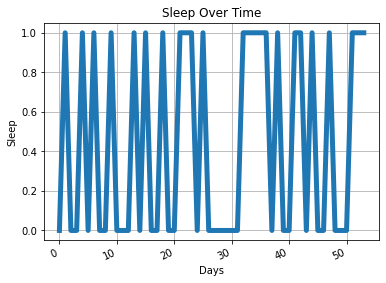

In [22]:
len=list(range(54))
utils.lineplot(len,sleep_binary,"Days","Sleep","Sleep Over Time")

#### Now let's make "Category" from checking data numeric using Sklearn Label Encoder:
* By converting a categorical attribute to numeric, we can use it for our kNN algorithm to try to build a predictive model

In [ ]:
#Now lets make "Category" numeric using label encoder
from sklearn import preprocessing
category_ser=merged_df["Category"]
category_list=category_ser.to_list()
category_types=utils.get_category_labels(category_ser)

le=preprocessing.LabelEncoder()
le.fit(category_types)#Fit numeric values to each label
print(category_types)
print(le.transform(category_types))

category_numeric=le.transform(category_list)#convert our series based on the numeric labels
merged_df.drop(["Category"],axis=1,inplace=True)#replace categorical series with numeric series in dataframe
merged_df["Category"]=category_numeric
merged_df.to_csv("merged.csv")

['Vending Machine', 'Gym', 'Coffee', 'Food', 'Hair', 'Groceries', 'Pandora', 'Income', 'Phone', 'Misc', 'Piercing', 'Gas', 'Amazon', 'Travel', 'Clothes', 'Vet Bill']
[14  6  2  3  7  5 10  8 11  9 12  4  0 13  1 15]


#### Now lets group our dataframe into 2 categories, good sleep and bad sleep, to see if we can make any observations:

In [ ]:
grouped_by_sleep=merged_df.groupby("Sleep")
good=grouped_by_sleep.get_group(1)
bad=grouped_by_sleep.get_group(0)
good.describe()


,tavg,tmin,tmax,prcp,wdir,wspd,pres,Amount,Sleep,Category
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.000000
mean,40.918750,32.458333,50.220833,0.036521,214.479167,5.316667,1019.879167,-31.735833,1.0,6.875000
std,8.485779,8.317709,10.026703,0.059071,107.515164,2.585523,7.832151,147.423876,0.0,4.376941
min,15.100000,6.100000,21.900000,0.000000,17.000000,0.900000,1004.800000,-623.200000,1.0,0.000000
25%,37.300000,29.725000,45.750000,0.000000,153.250000,3.875000,1015.850000,-31.782500,1.0,3.000000
50%,40.800000,32.000000,50.000000,0.000000,232.000000,5.200000,1020.650000,-11.595000,1.0,5.000000
75%,46.100000,38.700000,55.400000,0.045875,290.000000,6.525000,1026.300000,-5.162500,1.0,10.250000
max,54.500000,44.100000,69.800000,0.201000,359.000000,12.400000,1032.500000,286.510000,1.0,14.000000


In [ ]:
bad.describe()

,tavg,tmin,tmax,prcp,wdir,wspd,pres,Amount,Sleep,Category
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000
mean,40.016667,31.920000,49.066667,0.061733,194.633333,6.470000,1019.393333,1.677000,0.0,7.066667
std,9.568522,9.590167,10.558191,0.113084,110.782945,3.999582,7.008957,89.399625,0.0,5.179091
min,15.400000,10.900000,19.900000,0.000000,2.000000,1.100000,1000.000000,-174.380000,0.0,1.000000
25%,36.925000,28.500000,44.325000,0.000000,91.250000,3.175000,1014.400000,-13.787500,0.0,2.250000
50%,42.700000,33.100000,51.550000,0.000000,232.000000,5.950000,1017.850000,-6.240000,0.0,5.500000
75%,45.700000,37.400000,55.425000,0.078000,265.750000,8.900000,1024.500000,-2.697500,0.0,13.750000
max,52.700000,48.000000,62.600000,0.433000,341.000000,19.400000,1034.500000,343.820000,0.0,15.000000


* While these two stats tables don't tell us much about the link to categorical spending and sleep, on days that I got good sleep, I spent an average of $31, while on days that I got bad sleep, I averaged making money
    * Does this mean that making money makes it harder to sleep?  Or does buying food/spending money make it easier for me to sleep?
    * The world may never know
#### We can also use heatmaps to visualize correlations between attributes and sleep
* By focusing on the Sleep column, we can see the magnitude(absolute value) of correlation per attribute, as well as the polarity (positive or negative)

In [ ]:
corr_df=merged_df.corr()
corr_df.style.background_gradient(cmap='bwr').set_precision(2)

C:\Users\rache\AppData\Local\Temp/ipykernel_19696/1915756251.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df.style.background_gradient(cmap='bwr').set_precision(2)


,tavg,tmin,tmax,prcp,wdir,wspd,pres,Amount,Sleep,Category
tavg,1.00,0.94,0.95,0.17,0.16,0.21,-0.54,-0.03,0.05,-0.01
tmin,0.94,1.00,0.82,0.27,0.26,0.23,-0.55,-0.15,0.03,0.03
tmax,0.95,0.82,1.00,0.04,0.07,0.12,-0.45,0.07,0.06,0.00
prcp,0.17,0.27,0.04,1.00,0.10,0.34,-0.36,-0.08,-0.14,0.09
wdir,0.16,0.26,0.07,0.10,1.00,-0.07,-0.24,-0.22,0.09,0.03
wspd,0.21,0.23,0.12,0.34,-0.07,1.00,-0.44,-0.10,-0.17,-0.03
pres,-0.54,-0.55,-0.45,-0.36,-0.24,-0.44,1.00,0.12,0.03,-0.05
Amount,-0.03,-0.15,0.07,-0.08,-0.22,-0.10,0.12,1.00,-0.14,-0.12
Sleep,0.05,0.03,0.06,-0.14,0.09,-0.17,0.03,-0.14,1.00,-0.02
Category,-0.01,0.03,0.00,0.09,0.03,-0.03,-0.05,-0.12,-0.02,1.00


In [ ]:
# T TEST HERE ABOUT WHETHER OR NOT AMOmount of spending (bad sleep)> amoutn of spending (good sleep)

[Text(125.55000000000001, 190.26, 'Category <= 2.5\ngini = 0.495\nsamples = 29\nvalue = [16, 13]\nclass = Bad Sleep'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Bad Sleep'),
 Text(167.4, 135.9, 'Amount <= -2.85\ngini = 0.497\nsamples = 24\nvalue = [11, 13]\nclass = Good Sleep'),
 Text(83.7, 81.53999999999999, 'pres <= 1015.75\ngini = 0.415\nsamples = 17\nvalue = [5, 12]\nclass = Good Sleep'),
 Text(41.85, 27.180000000000007, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = Bad Sleep'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.18\nsamples = 10\nvalue = [1, 9]\nclass = Good Sleep'),
 Text(251.10000000000002, 81.53999999999999, 'tmax <= 63.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = Bad Sleep'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Bad Sleep'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Good Sleep')]

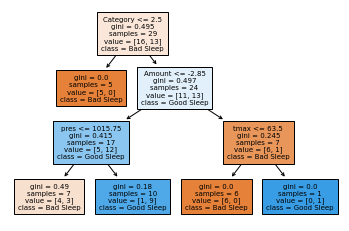

In [ ]:
#Decision tree time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

sleep_col=merged_df["Sleep"]
X=merged_df.copy()
X.drop(["Date"],axis=1,inplace=True)
X.drop(["tmin"],axis=1,inplace=True)
y=X.pop("Sleep")

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=25,random_state=0)
tree_clf=DecisionTreeClassifier(random_state=0,max_depth=3)
tree_clf.fit(X_train,y_train)
y_predicted=tree_clf.predict(X_test)
tree.plot_tree(tree_clf,feature_names=X.columns,class_names={1:"Good Sleep", 0:"Bad Sleep"},filled=True,max_depth=3,fontsize=7)

In [ ]:
#Build refine machine learning models
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=25,random_state=0)
knn_clf=KNeighborsClassifier(n_neighbors=4,metric="euclidean")#k=29 yeilds the best results
knn_clf.fit(X_train,y_train)
y2_predicted=knn_clf.predict(X_test)

for clf in [knn_clf, tree_clf]:
    print("CLF:",type(clf))
    accuracies=cross_val_score(clf,X,y,cv=5)
    y_predicted=cross_val_predict(clf,X,y,cv=5)
    accuracy=accuracy_score(y,y_predicted)
    print("Accuracy:",accuracy)
#Decision tree was slightly beter

CLF: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy: 0.5185185185185185
CLF: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 0.5


### Conclusion
* A: a short summary of the dataset used
* B. The classification approach you developed, it's performance, and ideas on ways to improve performance
* C. Describe the potential impacts including ethical impacts for the stakeholders described
